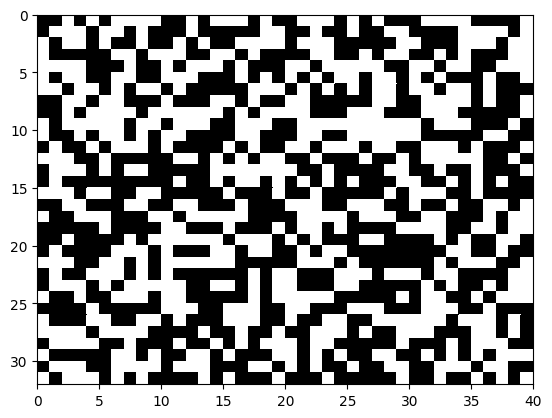

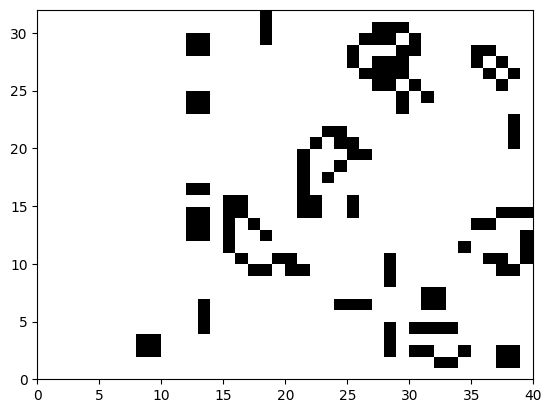

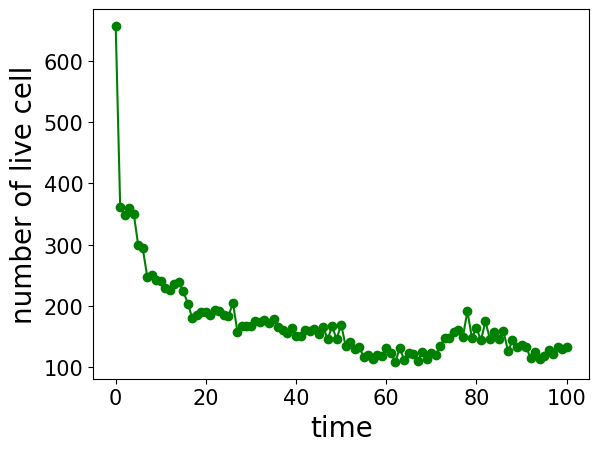

In [1]:
import random
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
m,n=32,40
def draw():
    global xs
    ax.invert_yaxis()
    plt.pcolor(xs,cmap='binary')
    plt.show()
xs=[[random.randint(0,1) for _ in range(n)]for _ in range(m)]
draw()
def count_neighbor(i,j):
    count=0
    for p in range(max(0,i-1),min(m,i+2)):
        for q in range(max(0,j-1),min(n,j+2)):
            if p!=i or q!=j:
                count+=xs[p][q]
    return count

def next_state(current,count):
    if current==0 and count==3:
     return 1
    elif current==1:
        if count==2 or count==3:
            return 1
        elif count<=1:
            return 0
        elif count >=4:
            return 0
    else: return 0
step=100
ts=list(range(step+1))
numbers=[sum([sum(xs[i]) for i in range (m)])]
for t in range(step):
    xs_next=[[0]*n for _ in range(m)]
    for i in range(m):
        for j in range(n):
            xs_next[i][j]=next_state(xs[i][j],count_neighbor(i,j))
    xs=xs_next
    numbers.append(sum([sum(xs[i])for i in range(m)]))
draw()

plt.plot(ts,numbers,color='green',marker='o')
plt.xlabel('time',fontsize=20)
plt.ylabel('number of live cell',fontsize=20)
plt.tick_params(labelsize=15)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
rc('animation', html='jshtml')
fig,ax=plt.subplots()
ax.invert_yaxis()
m,n=32,40
xs=[]
file=open('file1.txt','r')
text=file.read()
file.close()
for line in text.split():
    x_row=[]
    for value in line.split(','):
        x_row.append(int(value))
    xs.append(x_row)
def drawing():
    image=plt.pcolor(xs,cmap='binary')
    return [image]
history=[drawing()]
step=20
ts=list(range(step+1))
for t in range(step):
    xs_next=[[0]*n for _ in range(m)]
    for i in range(m):
        for j in range(n):
            xs_next[i][j]=next_state(xs[i][j],count_neighbor(i,j))
    xs=xs_next
    history.append(drawing())
anim=animation.ArtistAnimation(fig,history,interval=50,blit=True)
plt.close()
anim

一旦saveしてdirectory を確定しないとfileを開けない
数字の間に,を入れないとエラーを吐き出す